In [ ]:
pip install pixellib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [ ]:
from os import listdir

path = "../input/coco-2017-dataset/coco2017/test2017/" # path to the coco test pictures
theImages = listdir(path) # create an array with all the pictures file names in it

FileNotFoundError: [Errno 2] No such file or directory: '../input/coco-2017-dataset/coco2017/test2017/'

In [ ]:
import pixellib
from pixellib.semantic import semantic_segmentation
from pixellib.instance import instance_segmentation

def pixellibXception(pictureFile):
    # Open a segment model of xception model trained on pascal voc
    segment_image_sem = semantic_segmentation()
    segment_image_sem.load_pascalvoc_model("../input/deeplabv3-xception-tf-dim-ordering-tf-kernelsh5/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
    _, segmap     = segment_image_sem.segmentAsPascalvoc(pictureFile, output_image_name = "semantic"+pictureFile, overlay = False)
    _, segoverlay = segment_image_sem.segmentAsPascalvoc(pictureFile, output_image_name = "semantic"+pictureFile, overlay = True)
    return segmap, segoverlay

def pixellibCoco(pictureFile):
    # Open a segment model of Mask R_CNN model trained on Microsoft Coco dataset
    segment_image_ist = instance_segmentation()
    segment_image_ist.load_model("../input/mask-rcnn-coco/mask_rcnn_coco.h5")
    _, segoverlay = segment_image_ist.segmentImage(pictureFile, output_image_name = "instance"+pictureFile, show_bboxes = False)
    _, segbox     = segment_image_ist.segmentImage(pictureFile, output_image_name = "instance"+pictureFile, show_bboxes = True)
    return segoverlay, segbox

2022-07-01 09:09:17.574159: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
import random
pictureFile = "000000289784.jpg" # random.choice(theImages)

In [ ]:
segmap, segoverlay = pixellibXception(path+pictureFile)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed Image saved successfuly in your current working directory.
Processed Image saved successfully in your current working directory.


Text(0.5, 1.0, 'Segmentation overlay : 000000289784.jpg')

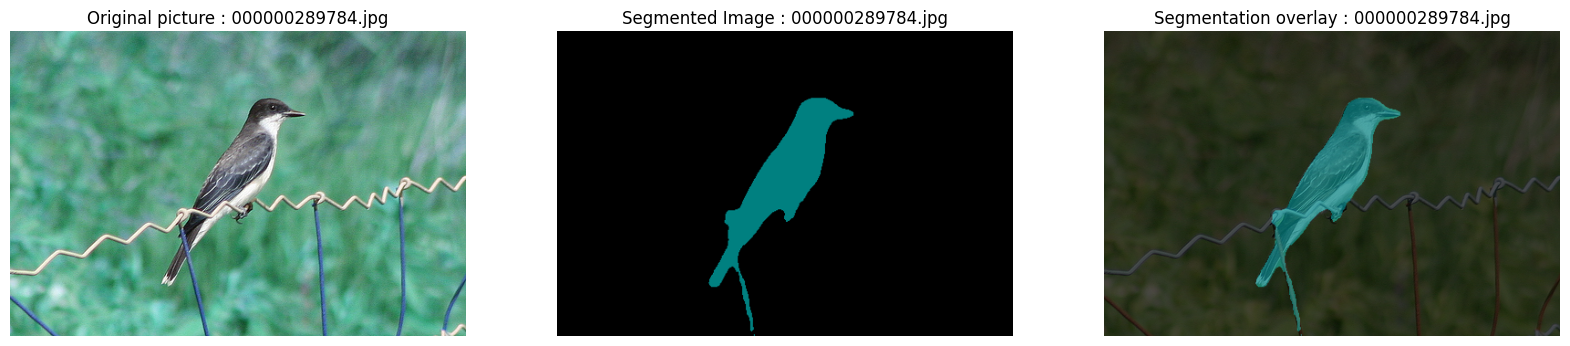

In [ ]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 50))

img = cv2.imread(path+pictureFile, cv2.IMREAD_COLOR)
fig.add_subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original picture : "+pictureFile)

fig.add_subplot(1, 3, 2)
plt.imshow(segmap)
plt.axis('off')
plt.title("Segmented Image : "+pictureFile)

fig.add_subplot(1, 3, 3)
plt.imshow(segoverlay)
plt.axis('off')
plt.title("Segmentation overlay : "+pictureFile)

In [ ]:
segoverlay2, segbox = pixellibCoco(path+pictureFile)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processed image saved successfully in your current working directory.
Processed image saved successfully in your current working directory.


Text(0.5, 1.0, 'Segmentation overlay + boxes : 000000289784.jpg')

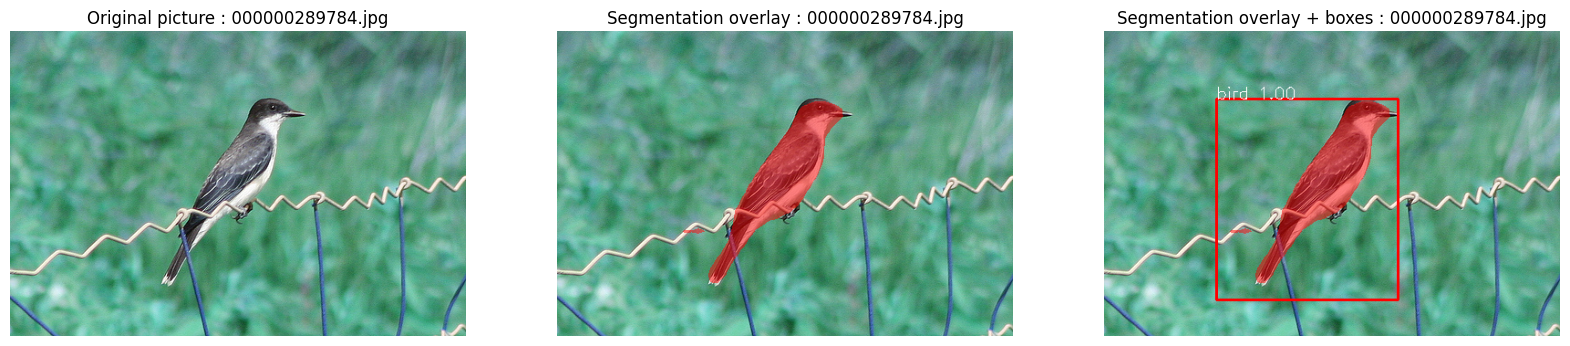

In [ ]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 50))

img = cv2.imread(path+pictureFile, cv2.IMREAD_COLOR)
fig.add_subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title("Original picture : "+pictureFile)

fig.add_subplot(1, 3, 2)
plt.imshow(segoverlay2)
plt.axis('off')
plt.title("Segmentation overlay : "+pictureFile)

fig.add_subplot(1, 3, 3)
plt.imshow(segbox)
plt.axis('off')
plt.title("Segmentation overlay + boxes : "+pictureFile)

In [ ]:
%%time
import random
nbLine, nbCol = 10, 2
thePicture = []

segment_image_sem = semantic_segmentation()
segment_image_sem.load_pascalvoc_model("../input/deeplabv3-xception-tf-dim-ordering-tf-kernelsh5/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")

segment_image_ist = instance_segmentation()
segment_image_ist.load_model("../input/mask-rcnn-coco/mask_rcnn_coco.h5")

for i in range(nbLine) :
    pictureFile = random.choice(theImages)
    _, segmap1 = segment_image_sem.segmentAsPascalvoc(path+pictureFile, overlay= True)
    _, segmap2 = segment_image_ist.segmentImage(path+pictureFile, show_bboxes= True)
    thePicture.append([segmap1, segmap2, pictureFile])

CPU times: user 8min 30s, sys: 4.14 s, total: 8min 35s
Wall time: 3min 16s


CPU times: user 449 ms, sys: 11 ms, total: 460 ms
Wall time: 460 ms


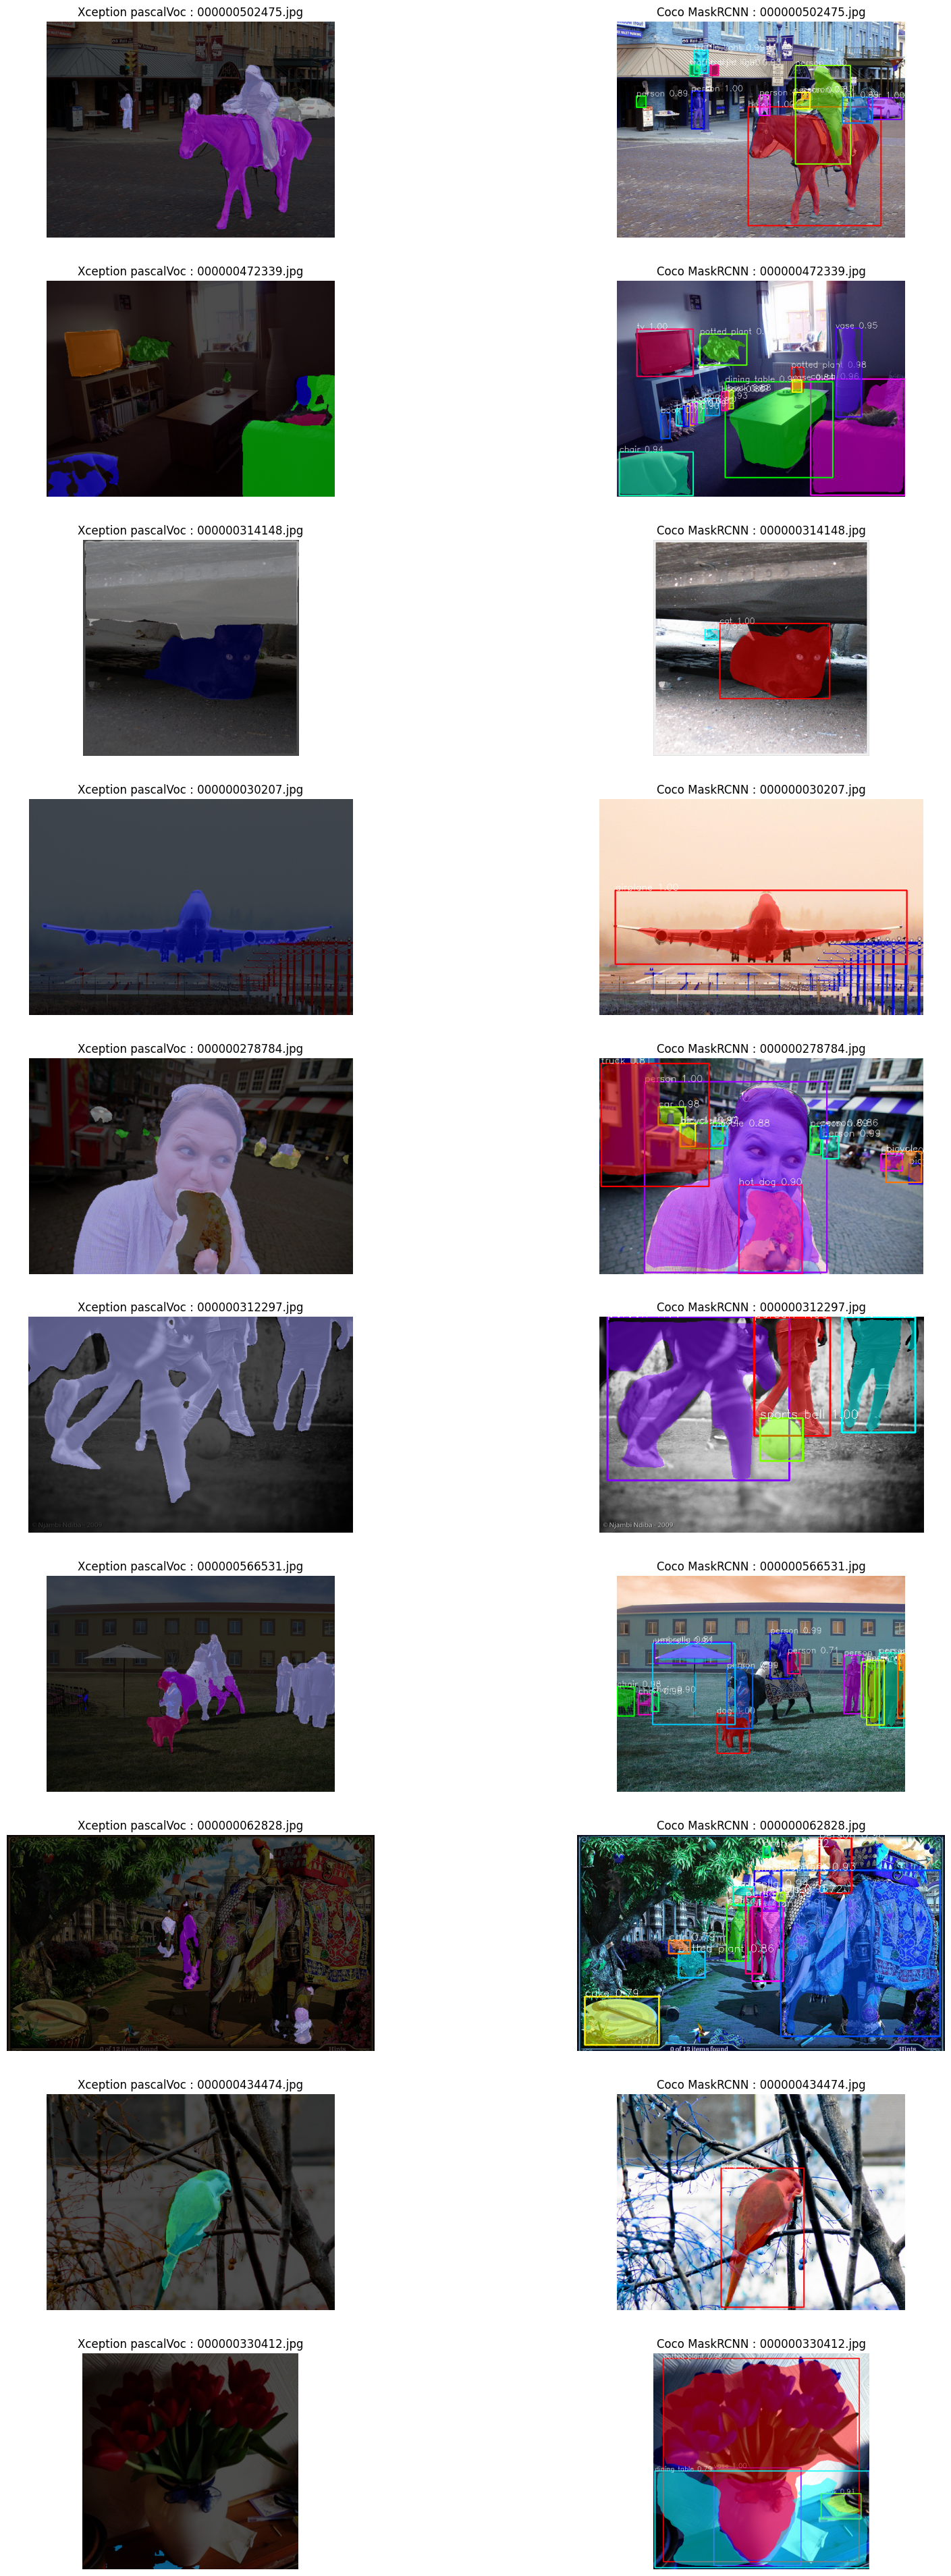

In [ ]:
%%time
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,50))

for i in range(nbLine) :
    fig.add_subplot(nbLine, nbCol, (i*2)+1)
    plt.imshow(thePicture[i][0])
    plt.axis('off')
    plt.title("Xception pascalVoc : "+thePicture[i][2])

    fig.add_subplot(nbLine, nbCol, (i*2)+2)
    plt.imshow(thePicture[i][1])
    plt.axis('off')
    plt.title("Coco MaskRCNN : "+thePicture[i][2])